# Student Performance Prediction
This notebook predicts student performance using regression based on provided datasets. The model is improved by using Gradient Boosting Regressor.

In [2]:

# Step 1: Install Required Libraries
# Ensure all necessary libraries are installed using pip
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required libraries
required_packages = ["ucimlrepo", "pandas", "scikit-learn", "numpy", "matplotlib"]

# Install missing libraries
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        install(package)
    

## Step 2: Import Libraries

In [3]:

# Import necessary libraries for data processing, analysis, and visualization
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
    

## Step 3: Fetch Dataset and Explore Characteristics

In [4]:

# Fetch the dataset from the UC Irvine Machine Learning Repository
student_performance = fetch_ucirepo(id=320)
data = student_performance.data.features
target = student_performance.data.targets['G3']

# Display basic information about the dataset
data.info()

# Check for missing values and handle them if present
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values.")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Step 4: Preprocess the Data

In [5]:

# Convert categorical features into numerical values using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Normalize numerical features to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)

# Define features (X) and target variable (y)
X = data_scaled
y = target

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

## Step 5: Train and Evaluate a Gradient Boosting Regressor

In [6]:

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model using performance metrics
# Mean Squared Error: Measures the average of the squares of the errors (difference between actual and predicted values)
mse = mean_squared_error(y_test, y_pred)

# R-squared: Indicates how well the model explains the variance of the target variable (closer to 1 is better)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error: Average of absolute differences between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Display evaluation results
print("Gradient Boosting Regressor Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
    

Gradient Boosting Regressor Results:
Mean Squared Error: 7.69
R-squared: 0.21
Mean Absolute Error: 2.07


## Step 6: Example Predictions

In [6]:

# Select the first 10 rows from the test set for predictions
example_features = X_test.iloc[:10]
actual_values = y_test.iloc[:10]
predicted_values = gb_model.predict(example_features)

# Display actual vs predicted values for selected examples
print("--- Example Predictions ---")
for i in range(len(example_features)):
    print(f"Student {i+1}: Predicted = {predicted_values[i]:.1f}, Actual = {actual_values.iloc[i]}")
    

--- Example Predictions ---
Student 1: Predicted = 13.4, Actual = 19
Student 2: Predicted = 12.3, Actual = 12
Student 3: Predicted = 14.8, Actual = 18
Student 4: Predicted = 12.5, Actual = 11
Student 5: Predicted = 12.0, Actual = 11
Student 6: Predicted = 13.6, Actual = 17
Student 7: Predicted = 14.4, Actual = 18
Student 8: Predicted = 8.9, Actual = 8
Student 9: Predicted = 12.6, Actual = 10
Student 10: Predicted = 12.7, Actual = 11


## Step 7: Visualize Relationships and Predictions

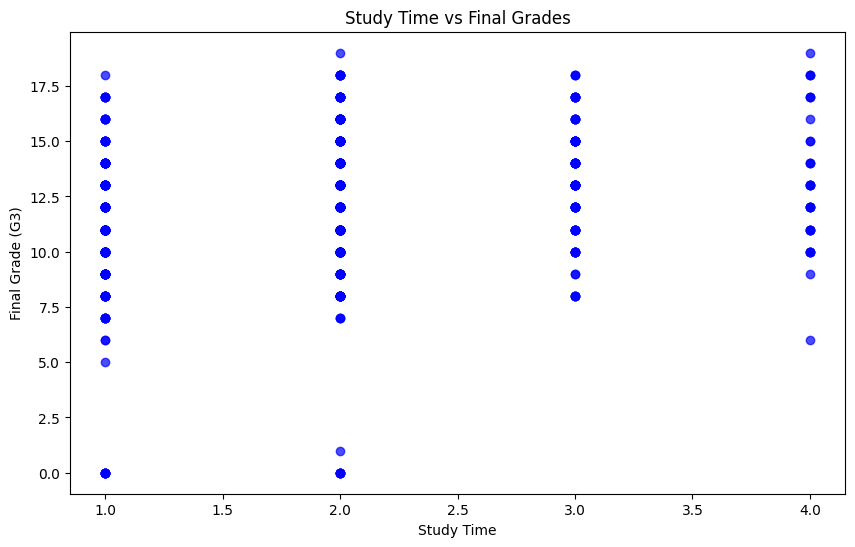

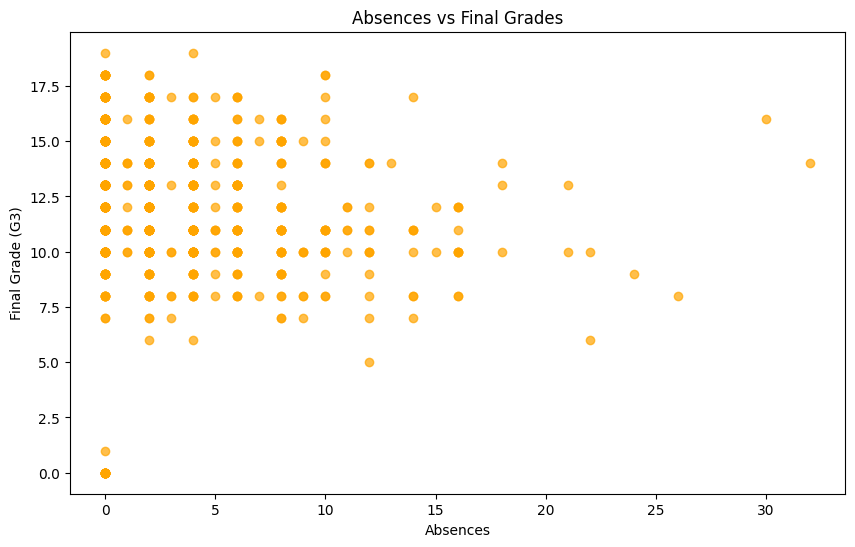

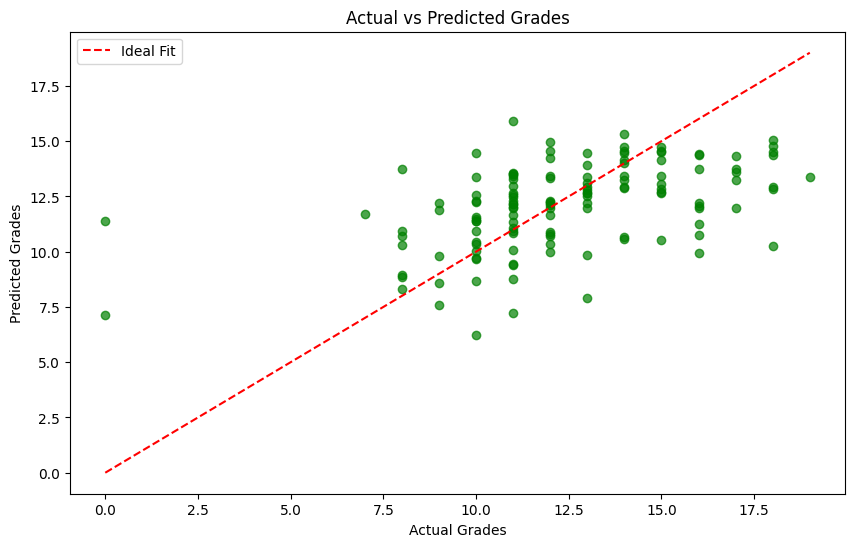

In [8]:

# Visualize the relationship between 'studytime' and final grades
plt.figure(figsize=(10, 6))
plt.scatter(data['studytime'], target, alpha=0.7, color='blue')
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs Final Grades")
plt.show()

# Visualize the relationship between 'absences' and final grades
plt.figure(figsize=(10, 6))
plt.scatter(data['absences'], target, alpha=0.7, color='orange')
plt.xlabel("Absences")
plt.ylabel("Final Grade (G3)")
plt.title("Absences vs Final Grades")
plt.show()

# Plot actual vs predicted values for test set predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Fit')
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.legend()
plt.show()
    